In [53]:
#dependencies
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import gmaps

url = "https://data.lacity.org/resource/2nrs-mtv8.json"
response = requests.get(url).json()

In [58]:
file_one = "../../Resources/crime_data.csv"
file_one_df = pd.read_csv(file_one)
    

In [59]:
crime_df = pd.DataFrame(file_one_df)
crime_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,201220752,09/16/2020 12:00:00 AM,09/16/2020 12:00:00 AM,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301481,211208872,03/19/2021 12:00:00 AM,03/19/2021 12:00:00 AM,1105,12,77th Street,1218,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,58TH ST,FIGUEROA ST,33.9897,-118.2827
301482,210506531,03/04/2021 12:00:00 AM,03/04/2021 12:00:00 AM,2210,5,Harbor,564,2,434,FALSE IMPRISONMENT,...,AA,Adult Arrest,434.0,NaN,NaN,NaN,200 W 2ND ST,NaN,33.7424,-118.2814
301483,211710505,07/09/2021 12:00:00 AM,07/09/2021 12:00:00 AM,1050,17,Devonshire,1798,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,8800 DEMPSEY AV,NaN,34.2302,-118.4775
301484,210312887,07/12/2021 12:00:00 AM,07/12/2021 12:00:00 AM,1200,3,Southwest,363,1,350,"THEFT, PERSON",...,IC,Invest Cont,350.0,NaN,NaN,NaN,CRENSHAW BL,STOCKER ST,34.0088,-118.3351


In [113]:
Type_Count=crime_df["Crm Cd Desc"].value_counts()

In [117]:
# Finding out the top 10 most common crime types in LA
Total_Type=crime_df["Crm Cd Desc"].count()
Percentage_Type=round((Type_Count / Total_Type) * 100,2).sort_values(ascending=False).head(10)
Percentage_Type

VEHICLE - STOLEN                                           10.80
BATTERY - SIMPLE ASSAULT                                    8.16
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     6.64
BURGLARY FROM VEHICLE                                       6.43
BURGLARY                                                    6.32
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              6.03
INTIMATE PARTNER - SIMPLE ASSAULT                           5.48
THEFT PLAIN - PETTY ($950 & UNDER)                          5.45
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             4.62
THEFT OF IDENTITY                                           3.92
Name: Crm Cd Desc, dtype: float64

In [110]:
Area_Count=crime_df["AREA NAME"].value_counts()
Total_Area=crime_df["AREA NAME"].count()
Percentage_Area=round((Area_Count / Total_Area) * 100,2).sort_values()

In [111]:
Percentage_Area

Foothill       3.46
Devonshire     3.92
Hollenbeck     3.96
West Valley    3.97
Topanga        4.04
Mission        4.12
Van Nuys       4.31
Northeast      4.33
Harbor         4.46
Rampart        4.55
Wilshire       4.61
West LA        4.69
Olympic        4.90
Newton         4.90
N Hollywood    5.13
Hollywood      5.29
Southeast      5.34
Southwest      5.55
Central        5.88
Pacific        6.00
77th Street    6.60
Name: AREA NAME, dtype: float64

In [63]:
crime_df["Vict Sex"].value_counts()

M    128418
F    108795
X     24841
H        31
Name: Vict Sex, dtype: int64

In [7]:
# Convert poverty rate as a list
# Convert bank rate to list
# poverty_rate = crime_df["Poverty Rate"].tolist()

In [8]:
# Create a map using state centroid coordinates to set markers
# marker_locations = census_data[['Latitude', 'Longitude']]

# Create a marker_layer using the poverty list to fill the info box
# fig = gmaps.figure()
# markers = gmaps.marker_layer(marker_locations)
# fig.add_layer(markers)
# fig

In [64]:
Actual_Age=pd.to_numeric(crime_df['Vict Age']).astype(float)


In [65]:
AgeBin = [0,18,25,35,45,65,90]
AgeGroup = ["Children and Teens(0-18)","Young Adults(19-25)", "Mid 20s to Mid 30s(26-35)", "Middle Age(36-45)", "Mid 40s to Mid 60s(46-65)", "Seniors(66-90)"]
crime_df["Age Group"]=pd.cut(Actual_Age,AgeBin,labels=AgeGroup,include_lowest=True)
crime_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Age Group
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,Middle Age(36-45)
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,Young Adults(19-25)
2,201220752,09/16/2020 12:00:00 AM,09/16/2020 12:00:00 AM,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630,Mid 40s to Mid 60s(46-65)
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,Seniors(66-90)
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,Mid 20s to Mid 30s(26-35)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301481,211208872,03/19/2021 12:00:00 AM,03/19/2021 12:00:00 AM,1105,12,77th Street,1218,1,510,VEHICLE - STOLEN,...,Invest Cont,510.0,NaN,NaN,NaN,58TH ST,FIGUEROA ST,33.9897,-118.2827,Children and Teens(0-18)
301482,210506531,03/04/2021 12:00:00 AM,03/04/2021 12:00:00 AM,2210,5,Harbor,564,2,434,FALSE IMPRISONMENT,...,Adult Arrest,434.0,NaN,NaN,NaN,200 W 2ND ST,NaN,33.7424,-118.2814,Middle Age(36-45)
301483,211710505,07/09/2021 12:00:00 AM,07/09/2021 12:00:00 AM,1050,17,Devonshire,1798,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,8800 DEMPSEY AV,NaN,34.2302,-118.4775,Middle Age(36-45)
301484,210312887,07/12/2021 12:00:00 AM,07/12/2021 12:00:00 AM,1200,3,Southwest,363,1,350,"THEFT, PERSON",...,Invest Cont,350.0,NaN,NaN,NaN,CRENSHAW BL,STOCKER ST,34.0088,-118.3351,Children and Teens(0-18)


In [66]:
crime_df["Age Group"].value_counts()

Children and Teens(0-18)     82513
Mid 20s to Mid 30s(26-35)    63658
Mid 40s to Mid 60s(46-65)    60543
Middle Age(36-45)            47119
Young Adults(19-25)          32943
Seniors(66-90)               14288
Name: Age Group, dtype: int64

In [77]:
Total_Victims=crime_df["Vict Age"].count()
Group_Count=crime_df["Age Group"].value_counts()
Percentage_Age=round((Group_Count / Total_Victims) * 100,2)

([<matplotlib.patches.Wedge at 0x202a60a1070>,
 [Text(-1.0854392366461707, -0.1783862762349678, 'Children and Teens(0-18)'),
  Text(0.1288237113130024, -1.0924305247490773, 'Mid 20s to Mid 30s'),
  Text(1.086405217777524, -0.17240563443742374, 'Mid 40s to Mid 60s'),
  Text(0.6253924308640945, 0.9049222659532138, 'Middle Age(36-45)'),
  Text(-0.25154204211282555, 1.0708532117193792, 'Young Adults(19-25)'),
  Text(-0.7282707326481848, 0.8243917393861223, 'Seniors(66-90)')],
 [Text(-0.5920577654433657, -0.09730160521907334, '27.4%'),
  Text(0.0702674788980013, -0.5958711953176785, '21.1%'),
  Text(0.5925846642422858, -0.09403943696586749, '20.1%'),
  Text(0.34112314410768785, 0.49359396324720745, '15.7%'),
  Text(-0.13720475024335937, 0.584101751846934, '10.9%'),
  Text(-0.3972385814444644, 0.4496682214833394, '4.7%')])

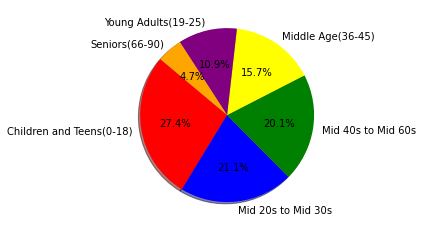

In [118]:
labels=["Children and Teens(0-18)","Mid 20s to Mid 30s","Mid 40s to Mid 60s","Middle Age(36-45)","Young Adults(19-25)","Seniors(66-90)"]
sizes=[82513,63658,60543,47119,32943,14288]
colors=["red","blue","green","yellow","purple","orange"]
plt.pie(sizes,labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [79]:
Gender_Victims=crime_df["Vict Sex"].value_counts()
Percentage_Gender=round((Gender_Victims / Total_Victims) * 100,2)

In [80]:
Percentage_Gender

M    42.60
F    36.09
X     8.24
H     0.01
Name: Vict Sex, dtype: float64

In [78]:
Percentage_Age

Children and Teens(0-18)     27.37
Mid 20s to Mid 30s(26-35)    21.11
Mid 40s to Mid 60s(46-65)    20.08
Middle Age(36-45)            15.63
Young Adults(19-25)          10.93
Seniors(66-90)                4.74
Name: Age Group, dtype: float64

In [74]:
# Group by gender from the dataframe and performing basic functions off of it
Gender_Tracker = crime_df.groupby("Vict Sex")
Victim_By_Gender = (Gender_Tracker["Vict Sex"]).count()
Percentage_Victims = (Victim_By_Gender / Total_Victims) * 100
# Created a new dataframe that visualizes player count by gender
Gender_df = pd.DataFrame({"Percentage of Victims": Percentage_Age})
Sorted_df = Gender_df.sort_values("Percentage of Victims", ascending = False)
Sorted_df

,Percentage of Victims
Children and Teens(0-18),27.368767
Mid 20s to Mid 30s(26-35),21.114745
Mid 40s to Mid 60s(46-65),20.081529
Middle Age(36-45),15.628918
Young Adults(19-25),10.926876
Seniors(66-90),4.739192


In [120]:
count=crime_df["Premis Desc"].value_counts().sort_values(ascending=False).head(7)
count

STREET                                          77849
SINGLE FAMILY DWELLING                          49567
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    36190
PARKING LOT                                     22274
SIDEWALK                                        14057
OTHER BUSINESS                                  13778
VEHICLE, PASSENGER/TRUCK                        10364
Name: Premis Desc, dtype: int64

([<matplotlib.patches.Wedge at 0x202a5eadd00>,
 [Text(-1.1083732860712041, -0.4599007052872621, 'Street'),
  Text(0.6291547688503368, -0.9023105212912456, 'Single Family Dwelling'),
  Text(1.0683643025319547, 0.26191165891462365, 'Apartments'),
  Text(0.5376851515738992, 0.9596325743621634, 'Parking Lot'),
  Text(0.0014933920896380152, 1.0999989862631996, 'Sidewalk'),
  Text(-0.4170773748561455, 1.017863676227375, 'Business Area'),
  Text(-0.7313909485709771, 0.8216247807536275, 'Vehicle')],
 [Text(-0.6465510835415356, -0.26827541141756955, '34.7%'),
  Text(0.3431753284638201, -0.4921693752497702, '22.1%'),
  Text(0.5827441650174298, 0.14286090486252195, '16.2%'),
  Text(0.29328280994939954, 0.5234359496520891, '9.9%'),
  Text(0.0008145775034389173, 0.5999994470526543, '6.3%'),
  Text(-0.22749674992153385, 0.5551983688512954, '6.1%'),
  Text(-0.3989405174023511, 0.4481589713201604, '4.6%')])

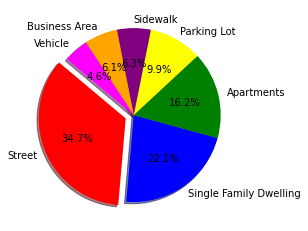

In [123]:
labels=["Street","Single Family Dwelling","Apartments","Parking Lot","Sidewalk","Business Area","Vehicle"]
sizes=[77849,49567,36190,22274,14057,13778,10364]
colors=["red","blue","green","yellow","purple","orange","magenta"]
explode = (0.1,0,0,0,0,0,0)
plt.pie(sizes,labels=labels,explode=explode,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [95]:
df = crime_df.set_index("Premis Desc")
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Age Group
Premis Desc,,,,,,,,,,,,,,,,,,,,,
SINGLE FAMILY DWELLING,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,Middle Age(36-45)
SIDEWALK,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,Young Adults(19-25)
"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",201220752,09/16/2020 12:00:00 AM,09/16/2020 12:00:00 AM,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630,Mid 40s to Mid 60s(46-65)
"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,Seniors(66-90)
BEAUTY SUPPLY STORE,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,Mid 20s to Mid 30s(26-35)


In [106]:
crime_df.loc[crime_df["Premis Desc"].value_counts() == 1]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).